In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of x_train: (50000, 32, 32, 3)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of y_test: (10000, 1)


In [3]:
print('min value:',x_train.min())
print('max value:',x_train.max())

min value: 0
max value: 255


In [4]:
# normalize
x_train=x_train/255.
x_test=x_test/255.

print('min value:',x_train.min())
print('max value:',x_train.max())

min value: 0.0
max value: 1.0


In [5]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

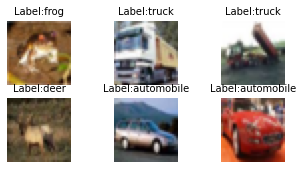

In [6]:
for i in range(6):
    plt.subplots_adjust(0.2)
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title('Label:{}'.format(labels[y_train[i][0]]),fontsize = 10)
    plt.axis('off')

In [7]:
# Reshaping for training
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)
Y_train=y_train.ravel()
Y_test=y_test.ravel()
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(50000, 3072)
(10000, 3072)
(50000,)
(10000,)


In [18]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Random forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
model_RF=RandomForestClassifier()
model_RF.fit(X_train,Y_train)

RandomForestClassifier()

In [11]:
y_pred_RF=model_RF.predict(X_test)
print('Accuracy:',accuracy_score(y_pred_RF,Y_test))

Accuracy: 0.4648


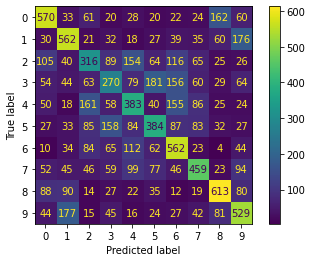

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_RF=confusion_matrix(Y_test,y_pred_RF)
disp_RF = ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp_RF.plot()

In [15]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1000
           1       0.52      0.56      0.54      1000
           2       0.36      0.32      0.34      1000
           3       0.33      0.27      0.30      1000
           4       0.38      0.38      0.38      1000
           5       0.42      0.38      0.40      1000
           6       0.46      0.56      0.51      1000
           7       0.51      0.46      0.48      1000
           8       0.58      0.61      0.60      1000
           9       0.47      0.53      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000



## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)

C:\Users\User\anaconda3\envs\tf_2.4\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred_LR=model_LR.predict(X_test)
print('Accuracy:',accuracy_score(y_pred_LR,Y_test))

Accuracy: 0.4063


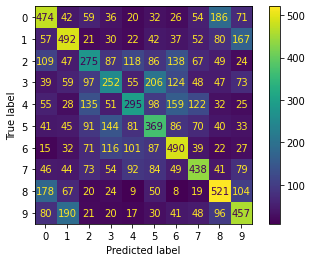

In [16]:
cm_LR=confusion_matrix(Y_test,y_pred_LR)
disp_LR = ConfusionMatrixDisplay(confusion_matrix=cm_LR)
disp_LR.plot()

In [17]:
print(classification_report(Y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.43      0.47      0.45      1000
           1       0.47      0.49      0.48      1000
           2       0.32      0.28      0.30      1000
           3       0.31      0.25      0.28      1000
           4       0.36      0.29      0.33      1000
           5       0.34      0.37      0.35      1000
           6       0.42      0.49      0.45      1000
           7       0.46      0.44      0.45      1000
           8       0.47      0.52      0.49      1000
           9       0.43      0.46      0.44      1000

    accuracy                           0.41     10000
   macro avg       0.40      0.41      0.40     10000
weighted avg       0.40      0.41      0.40     10000



## K-Nearest neighbours

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=2)

In [20]:
y_pred_knn=knn.predict(X_test)
print('Accuracy:',accuracy_score(Y_test,y_pred_knn))

Accuracy: 0.3116


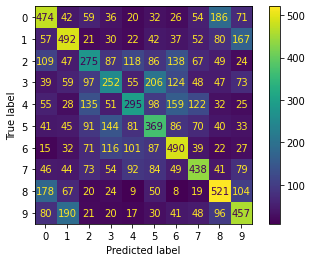

In [21]:
cm_knn=confusion_matrix(Y_test,y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_LR)
disp_knn.plot()

In [22]:
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.33      0.62      0.43      1000
           1       0.60      0.27      0.37      1000
           2       0.21      0.49      0.29      1000
           3       0.26      0.29      0.28      1000
           4       0.22      0.39      0.28      1000
           5       0.33      0.20      0.25      1000
           6       0.33      0.16      0.21      1000
           7       0.67      0.16      0.25      1000
           8       0.48      0.46      0.47      1000
           9       0.79      0.07      0.13      1000

    accuracy                           0.31     10000
   macro avg       0.42      0.31      0.30     10000
weighted avg       0.42      0.31      0.30     10000



## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [24]:
y_pred_DT=model_DT.predict(X_test)
print('Accuracy:',accuracy_score(Y_test,y_pred_DT))

Accuracy: 0.2664


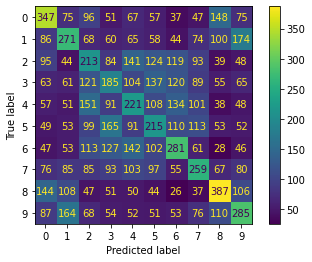

In [25]:
cm_DT=confusion_matrix(Y_test,y_pred_DT)
disp_DT = ConfusionMatrixDisplay(confusion_matrix=cm_DT)
disp_DT.plot()

In [26]:
print(classification_report(Y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.33      0.35      0.34      1000
           1       0.28      0.27      0.28      1000
           2       0.20      0.21      0.21      1000
           3       0.19      0.18      0.19      1000
           4       0.21      0.22      0.22      1000
           5       0.22      0.21      0.22      1000
           6       0.29      0.28      0.28      1000
           7       0.27      0.26      0.27      1000
           8       0.38      0.39      0.38      1000
           9       0.29      0.28      0.29      1000

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



## Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()

clf.fit(X_train,Y_train)

GradientBoostingClassifier()

In [28]:
y_pred_gb=clf.predict(X_test)
print('Accuracy:',accuracy_score(Y_test,y_pred_gb))

Accuracy: 0.4824


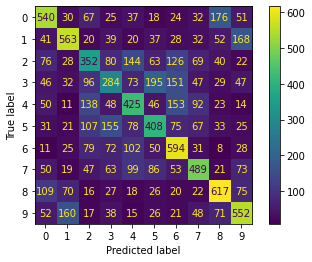

In [29]:
cm_gb=confusion_matrix(y_test,y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot()

In [30]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54      1000
           1       0.59      0.56      0.57      1000
           2       0.37      0.35      0.36      1000
           3       0.34      0.28      0.31      1000
           4       0.42      0.42      0.42      1000
           5       0.43      0.41      0.42      1000
           6       0.48      0.59      0.53      1000
           7       0.53      0.49      0.51      1000
           8       0.58      0.62      0.60      1000
           9       0.52      0.55      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.48      0.48      0.48     10000

